<a href="https://colab.research.google.com/github/safira123-pixel/PCVK_Genap_2023/blob/main/week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Safira Istifarini

Kelas : TI 3G

Presensi : 17

PRAKTIKUM

TUGAS MODUL 10

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

1. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas. 


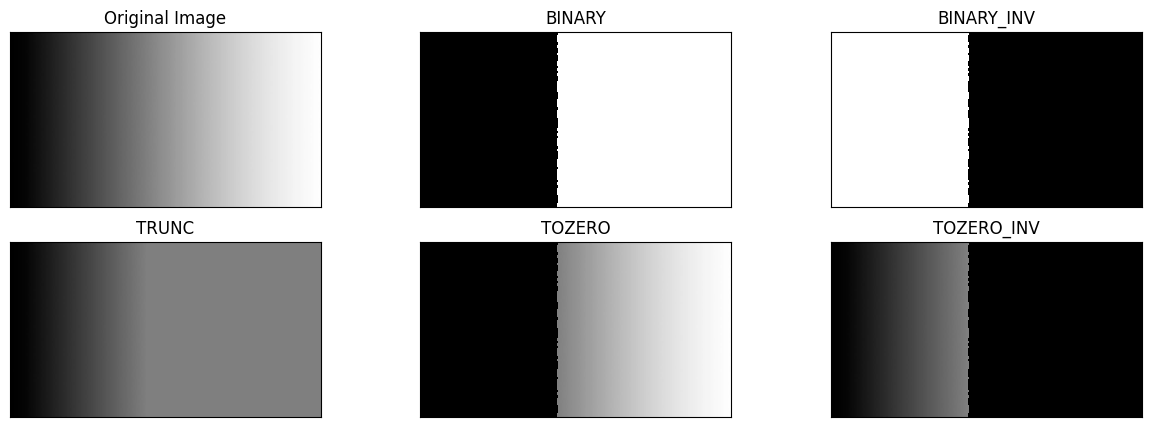

In [9]:
filename = ('/content/drive/MyDrive/PCVK/gradient.jpg')
img = cv.imread(filename)
thresh = 127 #nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
 plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

2. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

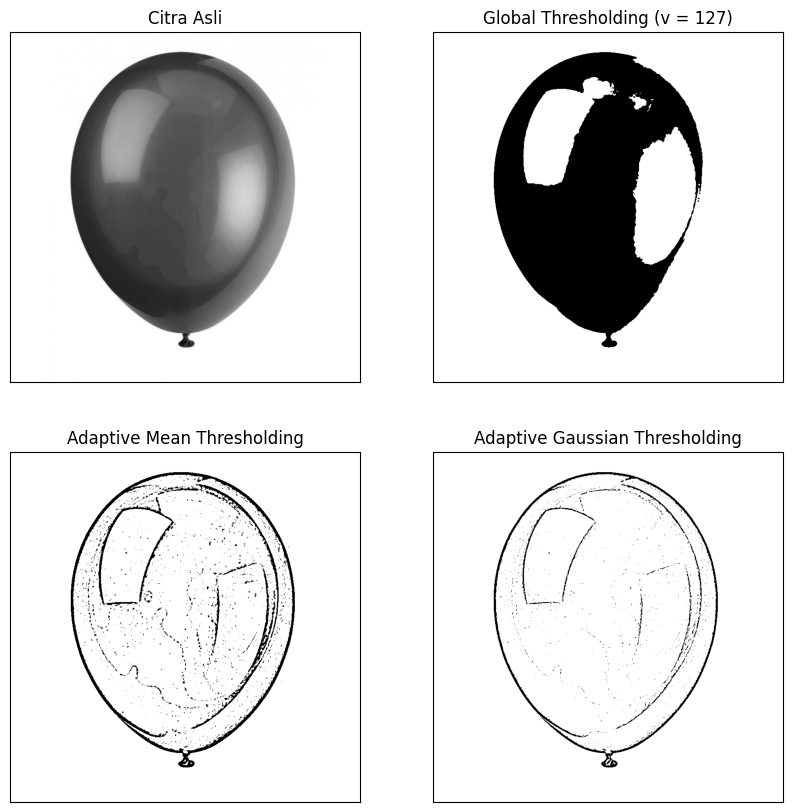

In [10]:
filename = ('/content/drive/MyDrive/PCVK/balloon.jpg')
citra = cv.medianBlur(cv.imread(filename),5)
gray = cv.cvtColor(citra, cv.COLOR_BGR2GRAY)
#gray = cv.medianBlur(gray,5)
thresh = 127
ret,th1 = cv.threshold(gray,thresh,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv
.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C
, cv.THRESH_BINARY,11,2)
titles = ['Citra Asli', 'Global Thresholding (v = 127)','Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
citra2 = [gray, th1, th2, th3]
plt.figure(figsize = (10,10))
for i in range(len(citra2)):
 plt.subplot(2,2,i+1),plt.imshow(citra2[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

3. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images. 

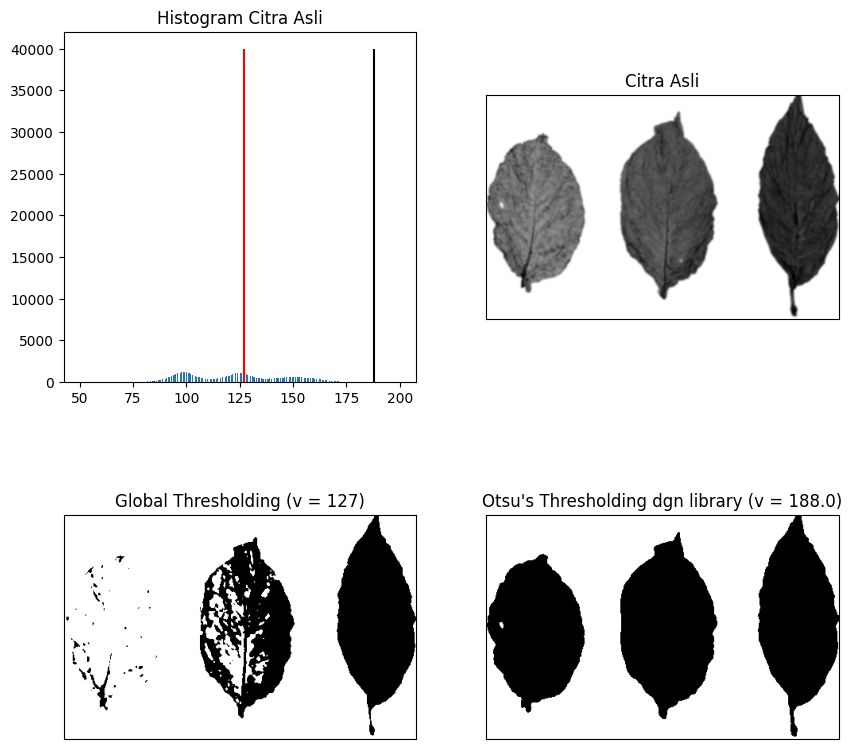

In [11]:
# Dengan Library
filename = ('/content/drive/MyDrive/PCVK/tobacco.jpg')
img = cv.imread(filename,0)
blur = cv.GaussianBlur(img,(5,5),0)
thresh = 127
ret,th1 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
ret2,th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])
plt.vlines(ret,0,40000,colors='red') #garis vertikal merah menunjukan threshold global 127
plt.vlines(ret2,0,40000,colors='black') #garis vertikal hitam menunjukkan threshold 92 hasil otsu's
plt.title('Histogram Citra Asli')
for i in range(len(citra3)):
 plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

4, Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja) 

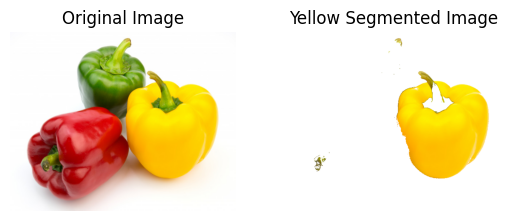

In [12]:
filename = '/content/drive/MyDrive/PCVK/peppers.jpg'
peppers = cv.imread(filename)

# HSV karena agar mudah mengambil warna kuning
hsv = cv.cvtColor(peppers, cv.COLOR_BGR2HSV)

lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])

white_bg = np.ones_like(peppers) * 255

mask = cv.inRange(hsv, lower_yellow, upper_yellow)

mask_inv = cv.bitwise_not(mask)

# mask putih
mask_wbg = cv.bitwise_or(white_bg, white_bg, mask=mask_inv)

yellow_image = cv.bitwise_and(peppers, peppers, mask=mask)
yellow_image_wbg = cv.bitwise_or(mask_wbg, yellow_image)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(cv.cvtColor(peppers, cv.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[1].imshow(cv.cvtColor(yellow_image_wbg, cv.COLOR_BGR2RGB))
axs[1].set_title('Yellow Segmented Image')
for ax in axs:
    ax.set_axis_off()
plt.show()

Pertanyaan 

Saat anda menampilkan warna tertentu, jelaskan kendala yang di hadapi dan mengapa hal itu terjadi.



5. Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda Copas code dan hasil image di modul ini. 